In [11]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("class labels:", np.unique(y)) # output : class labels: [0 1 2] (iris-Setosa, iris-Versicolor, iris-Verginicaは末でにintで格納)

class labels: [0 1 2]


In [14]:
#scikit-learnのtrain-test-splitを使ってテストデータととトレーニングデータに分割。30%のテストデータ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算（推定）。transformで標準化。
sc.fit(X_train)
X_train_std = sc.transform(X_train)
#テストデータでも同じスケーリングパラメータを使用し、相互比較を可能に。
X_test_std = sc.transform(X_test)

In [20]:
from sklearn.linear_model import Perceptron

#パーセプトロンモデルによる学習
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [21]:
#学習したモデルを使って予測してみよう
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())#ouput:Misclassified samples: 4 = 誤分類が4

Misclassified samples: 4


In [24]:
from sklearn.metrics import accuracy_score #scikit-learnにおける性能指標はmetricsよりimportできる

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred)) #y_testが真のクラスラベル、y_predが予測

Accuracy: 0.91


In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    #マーカーとかラーマップの設定
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #グリッドポイントの作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    #テストデータはoで表し強調
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

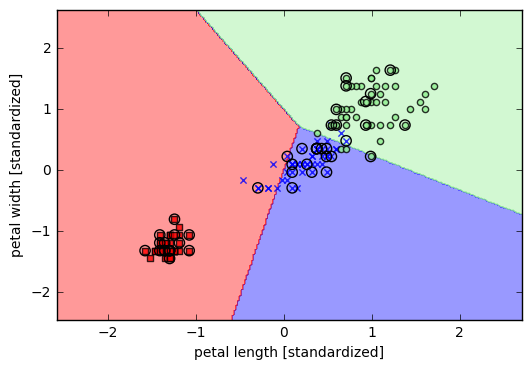

In [37]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

plt.show()
#完全な線系分離できないデータではパーセプトロンモデルは収束しない ->ロジスティック回帰を試してみる

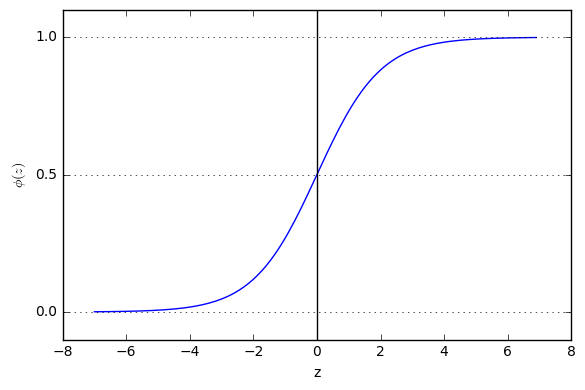

In [38]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z): #サンプルが特定のクラスに属している確率を予測。ロジスティック関数とも。
    return 1.0 / (1.0 + np.exp(-z)) #sigmoid function: φ(z) = 1/(1 + exp(-z))

z = np.arange(-7, 7, 0.1) #zは総入力。重みとサンプルの特徴量の線形結合。ここでは0.1感覚で-7~7までのデータ作成。
phi_z = sigmoid(z)

plt.plot(z, phi_z)
#垂直線の追加
plt.axvline(0.0, color='k')
#y軸の上限、加減設定
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

#目盛りの追加
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
#水平グリッド線の追加
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()

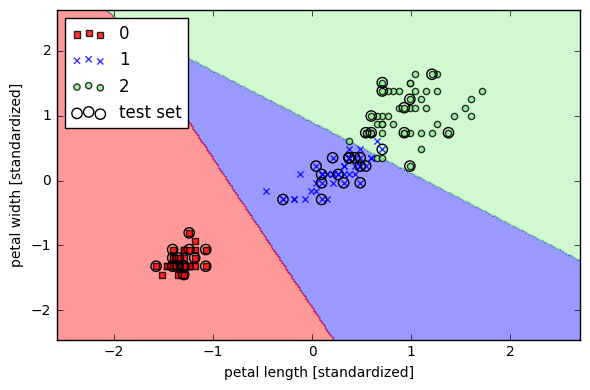

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

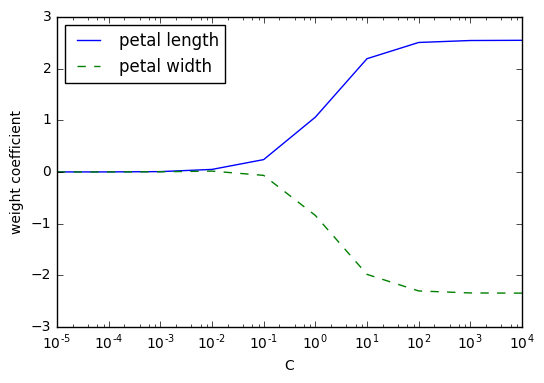

In [40]:
#正則化により、過学習へ対応する。正則化はロジスティック回帰で定義したコスト関数に対し、重みを小さくする正則化のこうを追加するだけ。
weights, params = [], []
for c in np.arange(-5, 5): #-5~5までのcを用いてC = 10**cの逆正則化パラメータを作成する。
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

plt.show()
#cが減少し（右から左へ動く）ほど正則化の強さが増し、重み係数が0に近づいていく。

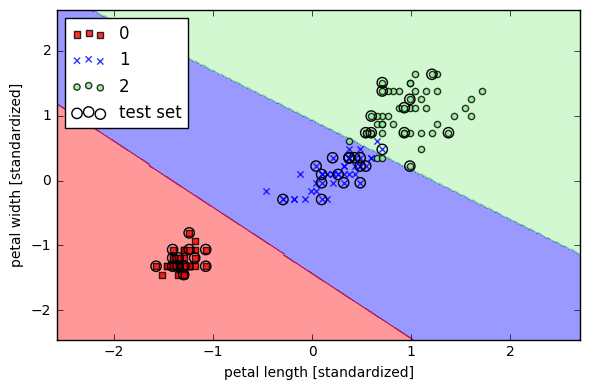

In [41]:
#サポートベクトルマシーンによる最大マージン分類。
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()
#ロジスティック回帰によく似ているが、SVMの方がより外れ値の影響を受けにくい。

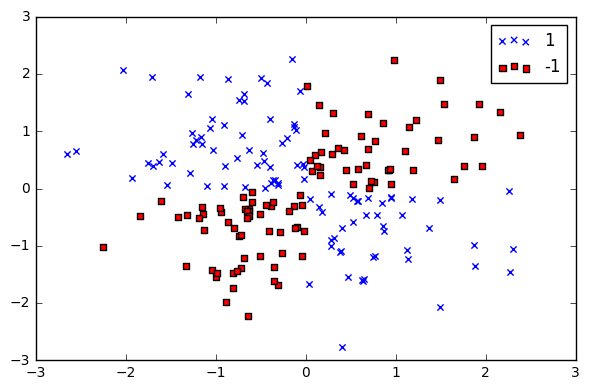

In [42]:
#カーネルSVMを使って非線形問題を解いてみる。
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
#標準正規分布に従う乱数の作成
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
#XORゲートを用いて100個のサンプルに1, 100個に-1を割り当てる。
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

plt.show()

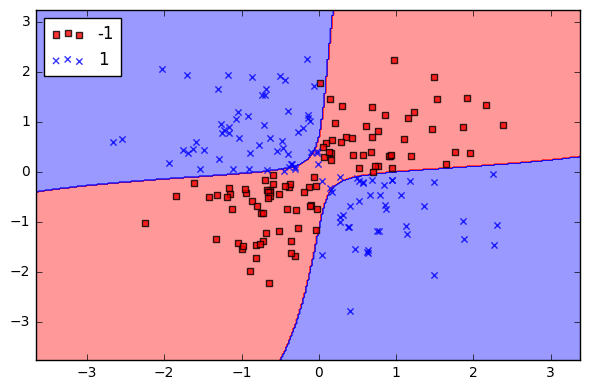

In [43]:
#kernel = linearをrbfに置き換えるだけ。gammaはカットオフパラメータ。これを小さくするとトレーニングサンプルの影響力が大きくなる。
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

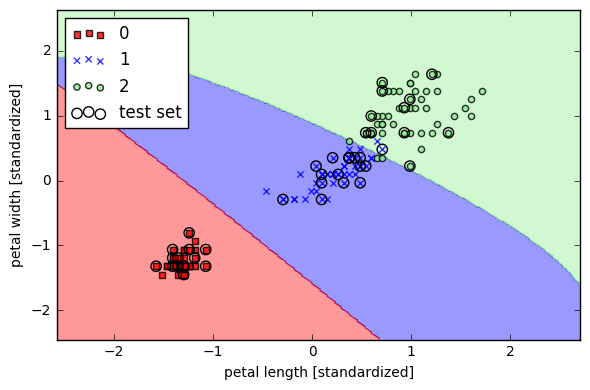

In [44]:
#irisデータセットでも使用してみる。
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

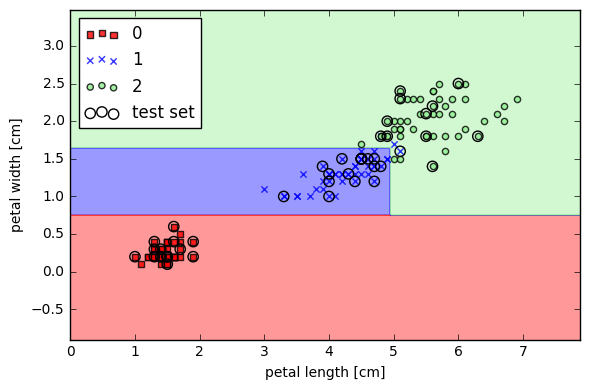

In [45]:
#決定木を用いて特徴空間を矩形に分割し、より不雑な決定境界を構築できる。
from sklearn.tree import DecisionTreeClassifier
#今回はエントロピーを二分決定木の不純どの指標に用いている。他に分類誤差、ジニ不純度など。
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

In [46]:
#トレーニング後の決定木の可視化
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

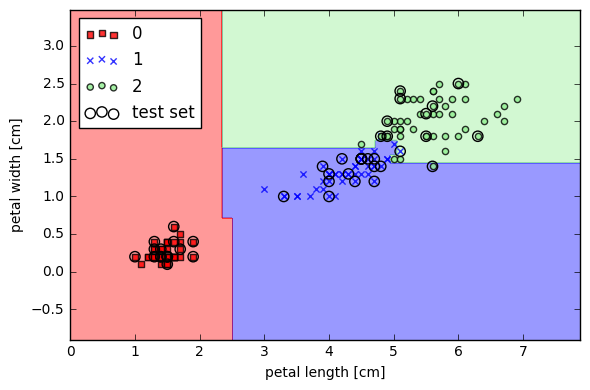

In [47]:
#ランダムフォレストを用いることで、弱い学習アルゴリズムと強い学習アルゴリズムを結合する。
from sklearn.ensemble import RandomForestClassifier
#n_estimators=10より、10個の決定きよりランダムフォレストをトレーニングする。
#エントロピーを不純どの指標として用いて、ノードを分割。
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

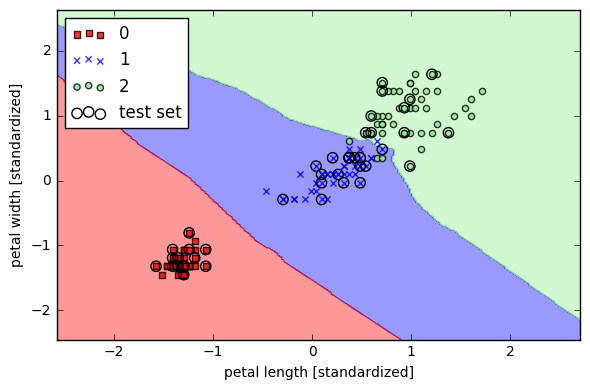

In [48]:
#k近傍法の実装。近いものを抽出して、ラベルの多数決を行い、最も多かったラベルを採用。怠惰学習の典型例。
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()